### imports


In [103]:
# ipython extension to autoreload imported modules so that any changes will be up to date before running code in this nb
%load_ext autoreload 
%autoreload 2

# libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Dense

from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.metrics import RootMeanSquaredError, MeanSquaredError
from spektral.layers import GCNConv, GlobalSumPool
from spektral.models import GCN
from spektral.data import MixedLoader
from lorenz import lorenzDataset, plot_with_predictions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### prepare data


In [104]:
DEFAULT_TIME_RESOLUTION = 0.01

THINGS TO TRY 
write helper functions! 
- play with diff sample size (500) - v
- input/output day ratio - h 
- play around with buffer - v
- activation layers - h
- play with the hidden layers - v 
- diff data samples / diff lorenz params - h 
- diff optimizer alg - v 

In [105]:
# TODO: add logging to see progress
dataset = lorenzDataset(
    n_samples=100,
    input_steps=2 / DEFAULT_TIME_RESOLUTION,  # 2 days
    output_delay=1 / DEFAULT_TIME_RESOLUTION,  # 1 day
    output_steps=1,
    min_buffer=100,
    rand_buffer=False,
    K=36,
    F=8,
    c=10,
    b=10,
    h=1,
    coupled=True,
    time_resolution=DEFAULT_TIME_RESOLUTION,
    seed=42)

train = dataset[:int(0.7 * dataset.n_graphs)]
val = dataset[int(0.7 * dataset.n_graphs):int(0.9 * dataset.n_graphs)]
test = dataset[int(0.9 * dataset.n_graphs):]
train_loader = MixedLoader(dataset=train, batch_size=32)
val_loader = MixedLoader(dataset=val, batch_size=32)
test_loader = MixedLoader(dataset=test, batch_size=32)

### train GCN model

In [106]:
GCN_model = GCN(
    n_labels=1,
    channels=32,  # same thing as n_hidden
    activation="relu",
    output_activation=None, # we want regression, i.e. a linear function
    use_bias=False,
    dropout_rate=0,
    l2_reg=0)
GCN_model.compile(
    optimizer='adamax',
    loss='mean_squared_error')
history = GCN_model.fit(
    train_loader.load(),
    steps_per_epoch=train_loader.steps_per_epoch,
    epochs=200)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(history.history['loss'])
ax.set_ylabel('mean squared error')
ax.set_xlabel('epochs')
fig.suptitle('model MSE over training epochs')
plt.tight_layout()
plt.show()



ValueError: Unknown optimizer: optimizer. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

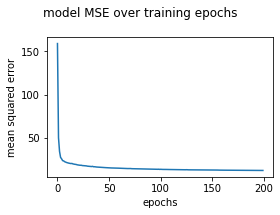

3/3 [==============================] - 0s 5ms/step


/opt/anaconda3/lib/python3.8/site-packages/spektral/data/utils.py:221: UserWarning: you are shuffling a 'lorenzDataset' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(a)


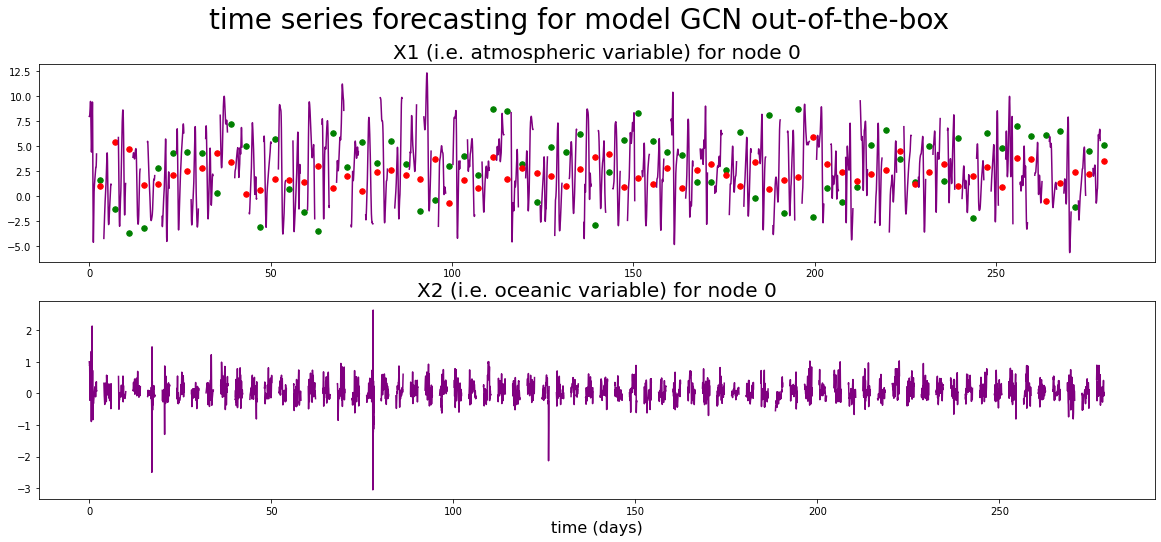

1/1 [==============================] - 0s 41ms/step


/opt/anaconda3/lib/python3.8/site-packages/spektral/data/utils.py:221: UserWarning: you are shuffling a 'lorenzDataset' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(a)


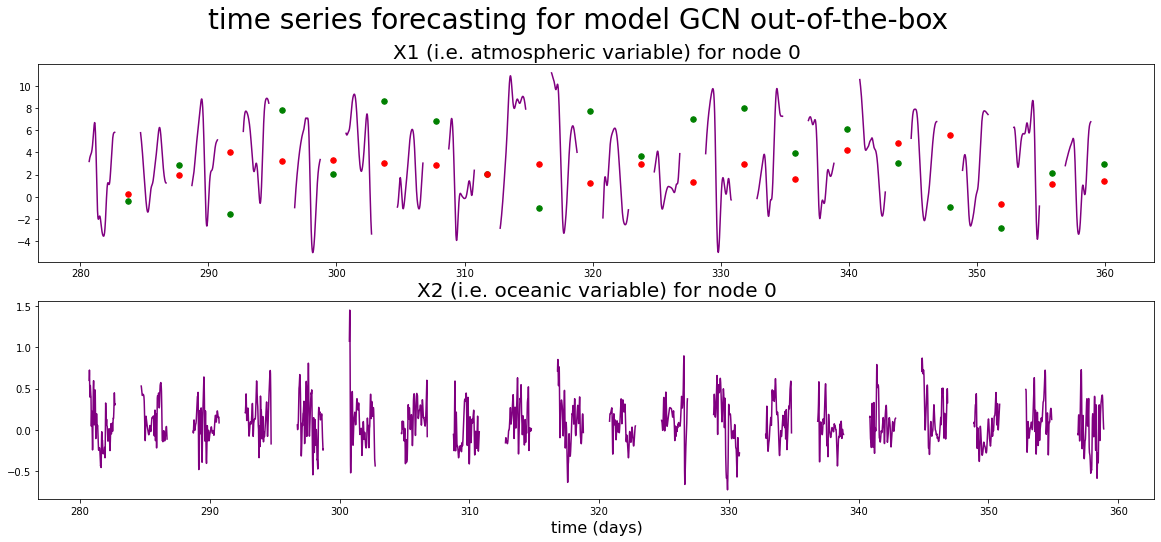

In [ ]:
# print(type(history.history))
# print(history.history)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(history.history['loss'])
ax.set_ylabel('mean squared error')
ax.set_xlabel('epochs')
fig.suptitle('model MSE over training epochs')
plt.tight_layout()
plt.show()


fig, (ax0, ax1) = plot_with_predictions(model=GCN_model,
                                        graph_dataset=train,
                                        Loader=MixedLoader,
                                        batch_size=32,
                                        node=0,
                                        model_name='GCN out-of-the-box')                                       
plt.show()



fig, (ax0, ax1) = plot_with_predictions(model=GCN_model,
                                        graph_dataset=val,
                                        Loader=MixedLoader,
                                        batch_size=32,
                                        node=0,
                                        model_name='GCN out-of-the-box')
plt.show()